<a href="https://colab.research.google.com/github/Daki-15/Classify-Handwritten-Digits/blob/main/Classify_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
# Import all dependece

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from datetime import datetime

In [99]:
# Load dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [100]:
# Number of train images
lenght = len(X_train)
lenght

60000

In [101]:
NUM_IMGAGES = 60000 #@param {type:"slider", min:0, max:60000, step:10}

In [102]:
# Displaying dataset using Matplotlib

def display(idx, data_set):
  plt.imshow(data_set[idx])


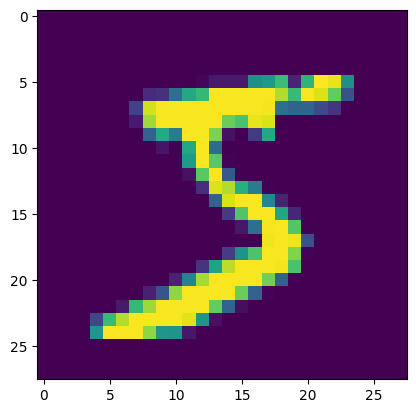

In [103]:
display(0, X_train)

In [104]:
# Make a neural network

def create_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])


  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  print(model.summary())

  return model


In [105]:
# Create model
model = create_model()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

None


In [106]:
NUM_EPOCHS = 15 #@param{type:'slider', min:10, max:100, step:1}

In [107]:
model.fit(X_train[:NUM_IMGAGES], y_train[:NUM_IMGAGES], epochs=NUM_EPOCHS)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8358 - loss: 4.2177
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9324 - loss: 0.3862
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9492 - loss: 0.2184
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9581 - loss: 0.1520
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9630 - loss: 0.1284
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9637 - loss: 0.1282
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9681 - loss: 0.1097
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9716 - loss: 0.1019
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9719 - loss: 0.0972
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9754 - loss: 0.0913
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9771 - loss: 0.0841
Epoch 12/15
1875/1875 ━━

In [108]:
# Prediction using trained model

predictions = model.predict([X_test])

def prediction(idx):

  print(f'Label -> {y_test[idx]}')
  print(f'prediction -> {np.argmax(predictions[idx])}')

  display(idx, X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Label -> 7
prediction -> 7


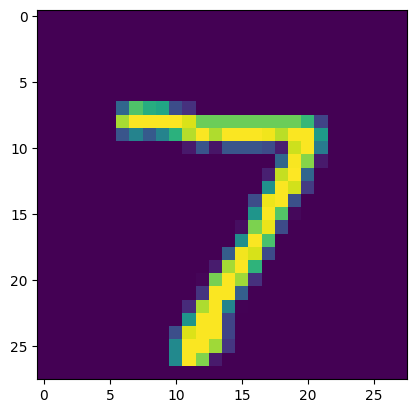

In [109]:
prediction(0)

In [110]:
def display_n_images(images, N, ncolumns=5):
  """
  Display a list of images in a grid using Matplotlib.
  Parameters:
    images (list of np.array): List of images to display.
    N: Number of images
    ncols (int): Number of columns in the grid. Defaults to 5.
  """
  nrows = (N + ncolumns - 1) // ncolumns

  plt.figure(figsize=(15, nrows * 3,))

  for i in range(N):
    plt.subplot(nrows, ncolumns, i+1)
    plt.title(y_test[i])
    plt.imshow(images[i])

  plt.tight_layout()
  plt.show()



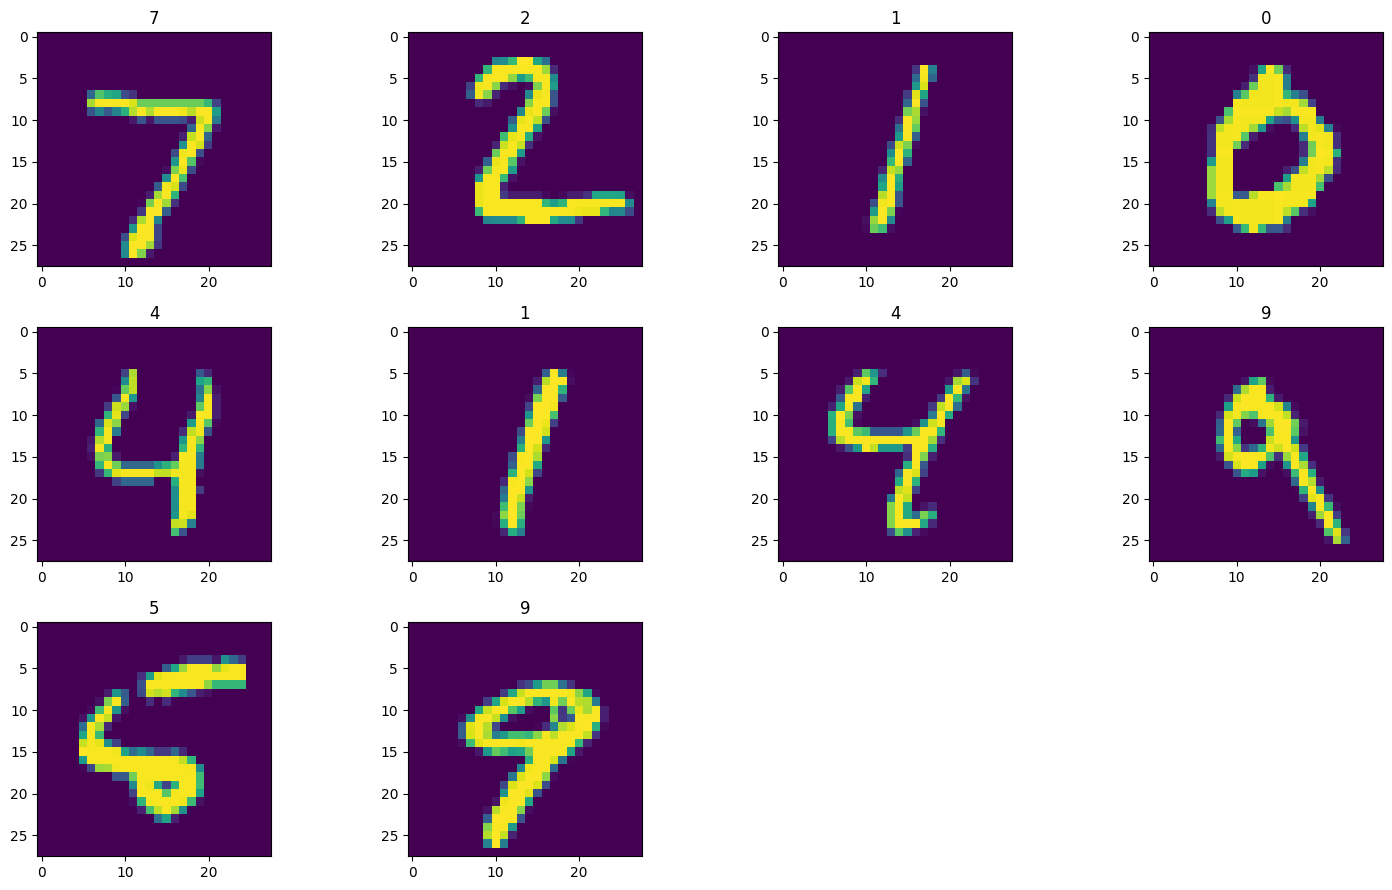

In [111]:
display_n_images(X_test, 10, 4)

In [112]:
# Save model
MODEL_PATH = "/content/drive/MyDrive/ML"
def save_model(model_to_save):
  model_to_save.save(f"{MODEL_PATH}/model--{datetime.now().strftime('%m:%d:%y, %H:%M')}_{NUM_IMGAGES}_images.h5")

In [113]:
save_model(model)

In [114]:
# loading the saved model
def load_model(MODEL_PATH):
  return tf.keras.models.load_model(MODEL_PATH)